<a href="https://colab.research.google.com/github/RaghavendraReddy004/DV_Tasks_Repo/blob/main/DV_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

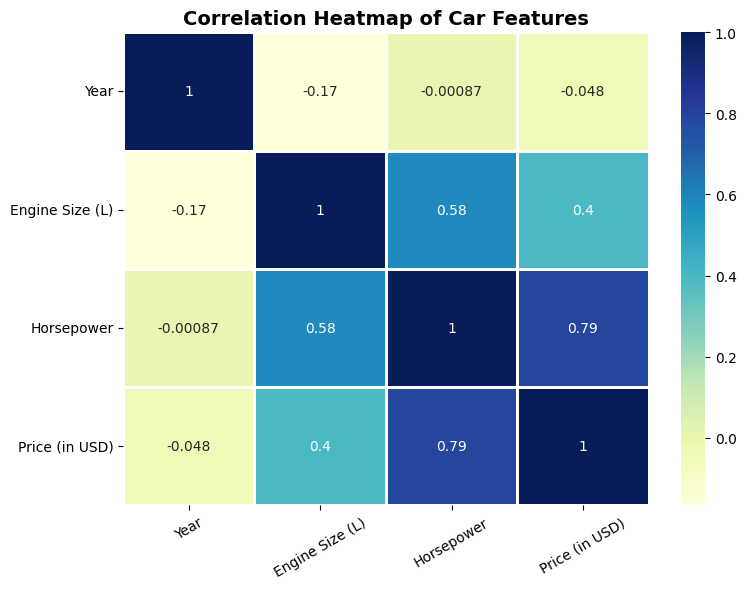

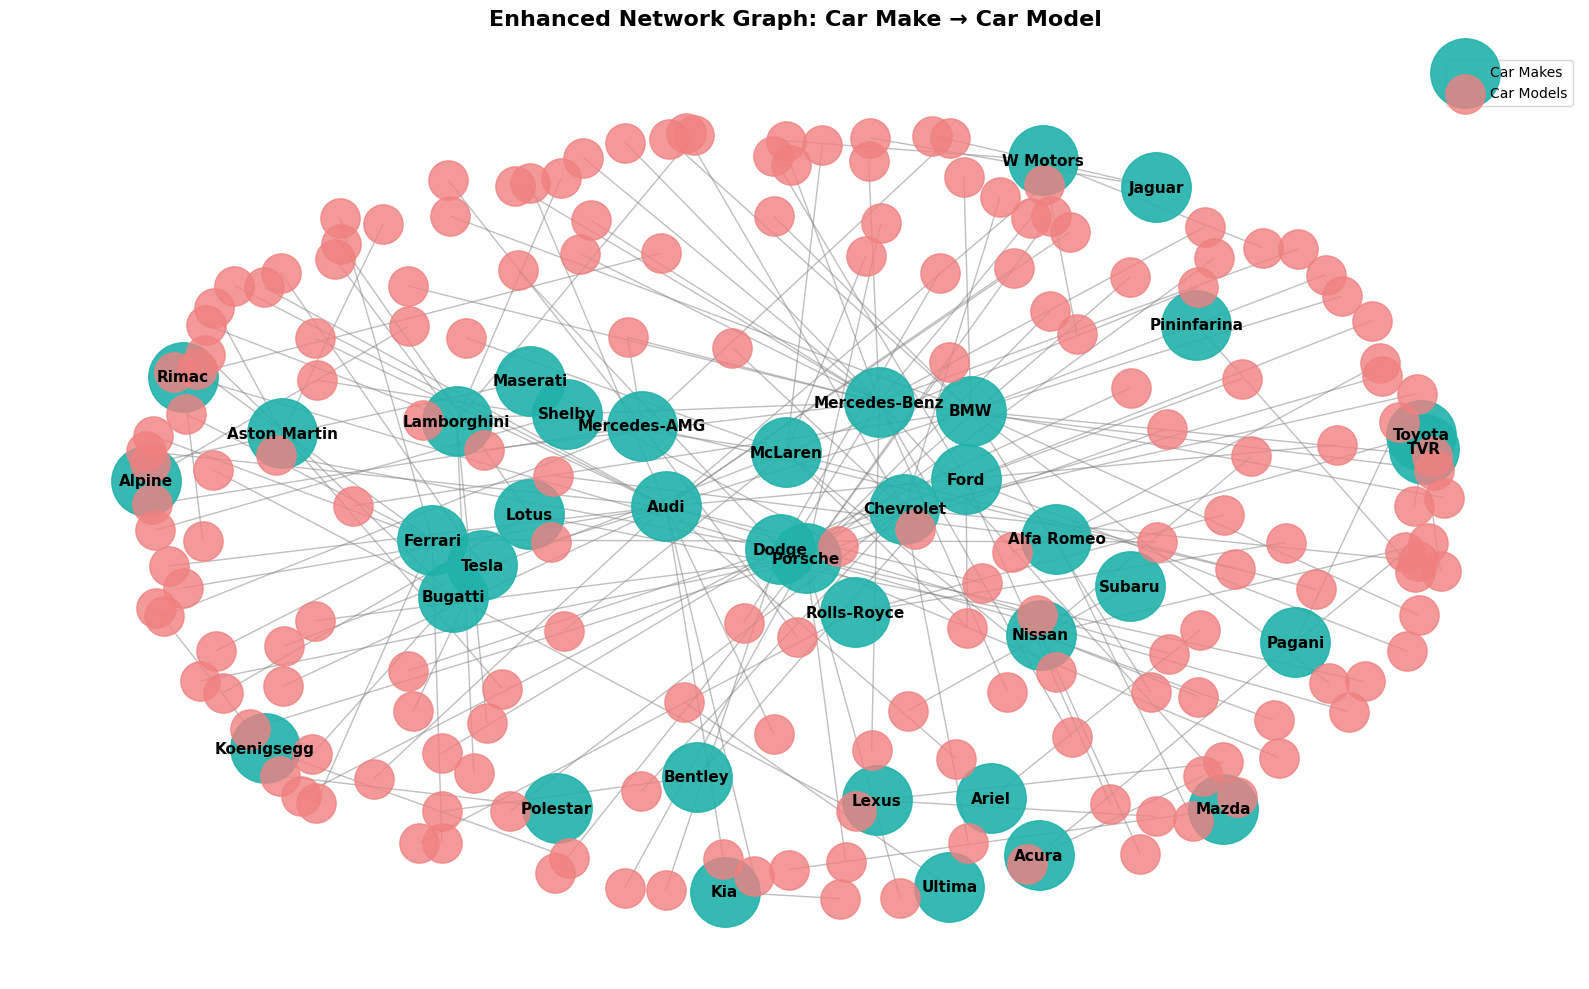

In [ ]:
# -----------------------------
# Importing Required Libraries
# -----------------------------
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.colors as mcolors

# -----------------------------
# 1. Load and Clean the Dataset
# -----------------------------
df = pd.read_csv("/content/Sport car price.csv")

# Clean and convert columns to numeric
df["Price (in USD)"] = df["Price (in USD)"].replace(r"[\$,]", "", regex=True).astype(float)
df["Engine Size (L)"] = pd.to_numeric(df["Engine Size (L)"].astype(str).str.replace(",", ""), errors="coerce")
df["Horsepower"] = pd.to_numeric(df["Horsepower"], errors="coerce")

# -----------------------------
# 2. Correlation Heatmap
# -----------------------------
df_numeric = df.dropna(subset=["Engine Size (L)", "Horsepower"]).copy()
numeric_cols = ["Year", "Engine Size (L)", "Horsepower", "Price (in USD)"]
df_numeric_corr = df_numeric[numeric_cols]

plt.figure(figsize=(8, 6))
sns.heatmap(
    df_numeric_corr.corr(),
    annot=True,
    cmap="YlGnBu",
    linewidths=1,
    linecolor="white"
)
plt.title("Correlation Heatmap of Car Features", fontsize=14, fontweight="bold")
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Scatter Plot: Horsepower vs Price
# -----------------------------
df_scatter = df.dropna(subset=["Engine Size (L)"]).copy()

fig_scatter = px.scatter(
    df_scatter,
    x="Horsepower",
    y="Price (in USD)",
    color="Car Make",
    size="Engine Size (L)",
    hover_data=["Car Model"],
    title="Horsepower vs Price by Car Make",
    template="plotly_dark"
)

fig_scatter.update_traces(marker=dict(line=dict(width=1, color="DarkSlateGrey")))
fig_scatter.show()

# -----------------------------
# 4. Enhanced Network Graph: Car Make → Car Model
# -----------------------------
G = nx.Graph()

# Add edges between Car Make and Car Model
for _, row in df.iterrows():
    car_make = row["Car Make"]
    car_model = row["Car Model"]
    G.add_edge(car_make, car_model)

# Separate makes and models
car_makes = set(df["Car Make"])
car_models = set(df["Car Model"])

# Layout for better spacing
pos = nx.spring_layout(G, k=0.7, iterations=70, seed=42)

plt.figure(figsize=(16, 10))

# Draw Car Make nodes (bigger teal nodes)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=car_makes,
    node_size=2500,
    node_color="lightseagreen",
    alpha=0.9,
    label="Car Makes"
)

# Draw Car Model nodes (smaller coral nodes)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=car_models,
    node_size=800,
    node_color="lightcoral",
    alpha=0.8,
    label="Car Models"
)

# Draw connecting edges
nx.draw_networkx_edges(
    G,
    pos,
    width=1.0,
    alpha=0.5,
    edge_color="gray"
)

# Draw labels for car makes only (to avoid clutter)
nx.draw_networkx_labels(
    G,
    pos,
    labels={make: make for make in car_makes},
    font_size=11,
    font_weight="bold",
    font_color="black"
)

# Add legend and title
plt.legend(scatterpoints=1, fontsize=10)
plt.title("Enhanced Network Graph: Car Make → Car Model", fontsize=16, fontweight="bold", pad=20)
plt.axis("off")
plt.tight_layout()
plt.show()
